# Sequential DNA analysis

The problem of dna subsequence matching is a very difficult problem in computer science, belonging to a category of problems known as Nondeterministic Polynomial, or NP. These problems are often of exponential time complexity, and therefore can take enormous amounts of time to analyse completely.

Therefore, some techniques can be applied to reach suboptimal results in a more attainable timeframe. As such, some of these techniques are known as Heuristics. These allow for an algorithm to exploit known characteristics of the problem.

In this report, I delve into four different approaches to solve this problem. As they stand:
- Smith Waterman Heuristic:

    The Smith Waterman heuristic makes use of a Matrix to analyze every combination more efficiently, and then allows for back-tracking through said matrix for reconstructing the substring which produced the highest score. This algorithm makes use of mostly exploitation, and very little exploration.

- Local Search

    The Local Search algorithm will take a random substring of one of the sequences, and then try to match it to a series of random subsequences in the other sequence, so as to try varying combinations, and hopefully achieve a close solution to the real best fit. This algorithm makes use of mostly exlporation, and very little exploitation.

- Exaustive Search

    Exaustive Search consists on a naive implementation of the basic concept of "Search every combination to make sure you know the best one". It is pure exploration, as it needs no information about the structure of the problem to create the space of possibilities.

- Bounded Exaustive Search

    Bounded Exaustive Search is a more balanced approach, which searches through possibilities in a certain order, so as to maximize the chances of getting the best score possible, as quickly as possible, and once no improvement is available from that point, computations are terminated.

In [1]:
import os
import pandas as pd
import time
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D
import random

test_list = list(map(lambda x: 'in/'+x, os.listdir('in')))

exe = ['Sequential/LocalSearch/main', 'Sequential/SmithWaterman/main', 'Sequential/ExaustiveSearch/main', 'Sequential/BoundedExaustiveSearch/main']

class Test():
    def __init__(self, name, size_a, size_b, time):
        self.name = name
        self.size_a = size_a
        self.size_b = size_b
        self.time = time
    def __repr__(self):
        return f"{self.name=}, {self.size_a=}, {self.size_b=}, {self.time=}"
    def __str__(self):
        return f"{self.name=}, {self.size_a=}, {self.size_b=}, {self.time=}"

def gen_seq(n, m):
     seq=[str(n)+'\n',
          str(m)+'\n',
          ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
          ''.join(random.choices(['A','T','C','G','-'],k=m))]
     return ''.join(seq)



# Testing

Below, 400 tests ranging from two small sequences of 10x10 bases, to 200x200 bases are evaluated and then stored in a .pickle file (tests took around 12min, so I prefered to cache it to prevent re-calculating everything).

Particularly, tests were run 5 times for the Bounded Exaustive Search algorithm, 20 times for LocalSearch and 15 times for SmithWaterman (The naive exaustive search was run only once, and only where no sequence exceeded 100 bases. This was done because of the long runtimes for larger inputs on this algorithm). 

In [2]:
try:
    with open('test_cache.pickle', 'rb') as f:
        time_dict = pickle.load(f)
except Exception:
    time_dict = {}
    for x in exe:
        time_dict[x] = []
    progress = 0
    for i in test_list:
        for ex in exe:
            with open(i, 'r') as f:
                r = f.read()
            size_a, size_b = r.split('\n')[0:2]
            size_a = int(size_a)
            size_b = int(size_b)
            sub_list = []
            repeats = 5
            if ex == 'Sequential/LocalSearch/main':
                repeats = 20
            if ex == 'Sequential/SmithWaterman/main':
                repeats = 15
            if ex == 'Sequential/ExaustiveSearch/main':
                repeats = 1
                if size_a > 100 or size_b > 100:
                    continue
            for _ in range(repeats):
                start=time.perf_counter()
                subprocess.run(['./'+ex], input=r, text=True, capture_output=True)
                end=time.perf_counter()
                sub_list.append((end-start)*1000)
                # print(f"File {ex} took {(end-start)*1000000:0.2f}us to run on input {i}")
            time_dict[ex].append(Test(i, size_a, size_b, np.mean(sub_list)))
        # print("Done with ", i)
        progress += 1
        print(f"Progress: {progress}/{len(test_list)} ({100*progress/len(test_list):.02f}%)")
        with open('test_cache.pickle', 'wb') as f:
            pickle.dump(time_dict, f)

# Analysis

Below, 4 3D graphs are created to analyse the time progression of all 4 algorithms. These all have the sizes of the sequences on the x and y axes, and the z axis represents the time in milliseconds (where there were more than 1 run, average time was used).

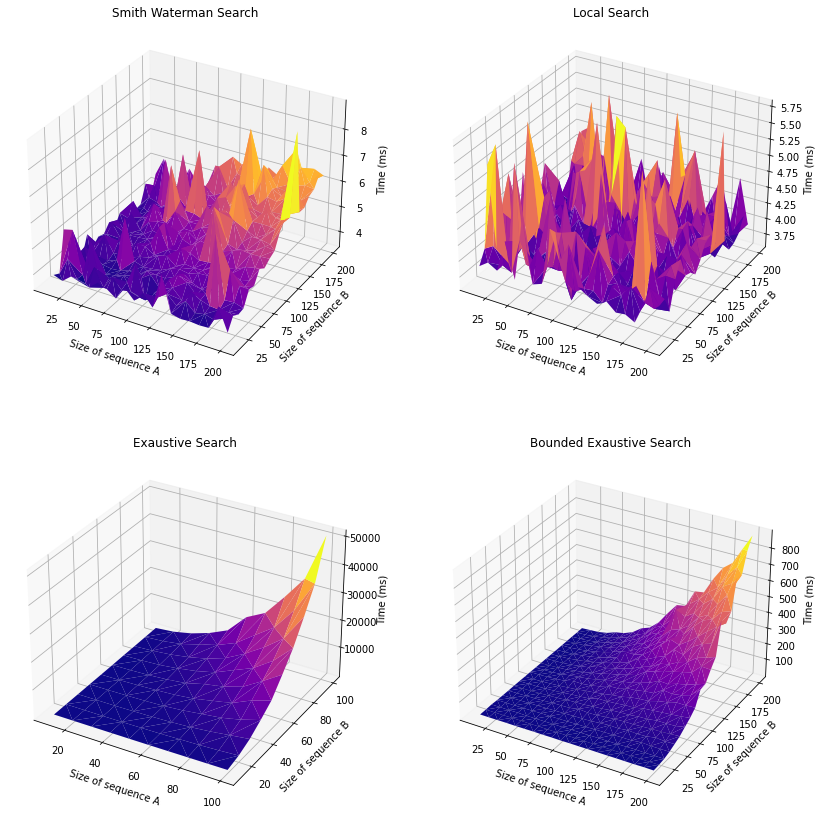

In [3]:

# Exaustive Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/ExaustiveSearch/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
fig = plt.figure(figsize=(14,29))
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax.set_xlabel('Size of sequence A')
ax.set_ylabel('Size of sequence B')
ax.set_zlabel('Time (ms)')
ax.set_title('Exaustive Search')


# Local Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/LocalSearch/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax2.set_xlabel('Size of sequence A')
ax2.set_ylabel('Size of sequence B')
ax2.set_zlabel('Time (ms)')
ax2.set_title('Local Search')


# SmithWaterman Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/SmithWaterman/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax3 = fig.add_subplot(221, projection='3d')
ax3.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax3.set_xlabel('Size of sequence A')
ax3.set_ylabel('Size of sequence B')
ax3.set_zlabel('Time (ms)')
ax3.set_title('Smith Waterman Search')


# Bounded Exaustive Search
experiment_list_exaustive = list(map(lambda x: x.__dict__ ,time_dict['Sequential/BoundedExaustiveSearch/main']))
experiment_list_exaustive
congregated = {}
for k in list(experiment_list_exaustive[0]):
    congregated[k] = []
for d in experiment_list_exaustive:
    for k,v in d.items():
        congregated[k].append(v)
df = pd.DataFrame(congregated).sort_values('time',ascending=False).reset_index().drop('index', axis=1)
ax4 = fig.add_subplot(122, projection='3d')
ax4.plot_trisurf(df['size_a'], df['size_b'], df['time'], cmap='plasma')
ax4.set_xlabel('Size of sequence A')
ax4.set_ylabel('Size of sequence B')
ax4.set_zlabel('Time (ms)')
ax4.set_title('Bounded Exaustive Search')


fig.show()

 As may be seen on the above graphs, local search took a constant time, which might seem as a complexity of O(1), however it is worth noting that this does not guarantee optimal output, and only checks a select portion of the sequence.

 Smith Waterman is also similar in that it is very fast, altough not optimal, however there does seem to be some increase in time based on input size (albeit non-linear).  

 The naive Exaustive search is extremely slow, clocking in at around 50 seconds for some of the larger inputs. It does however guarantee the optimal solution.

 The alternative Bounded Exaustive Search did seem to produce the same results as the naive Exaustive search in my tests, but I'm not confident it is also optimal. Whatever the case may be, it is around 100x faster than its naive counterpart, and still produces great results.

# In-depth analysis of algorithms

## SmithWaterman

The Smith Waterman heuristic seems to present a good balance between speed and accuracy. It is, however, not possible to analyze the score proximity to the other algorithms, beacause of a critical difference in strategy. Smith Waterman considers possible gaps in sequences, such that sequences like 'CTG' and 'CAG' get matched not only as themselves, but also 'C-G' to 'C-G' and '-TG' to C-G'. When comparing large sequences, this can produce large differences and create high-scoring long sequences, that don't match other searches that were implemented.

The main point of contention with Smith Waterman is its space complexity (creating a $n \times m$ matrix is quite space-intensive), as is the case with most dynamic programming solutions.

## Local Search

As presented, the Local Search algorithm produced very fast times across the board, which would be very impressive, if it had achieved anywhere near the correct solution. As implemented, it simply can't try that many possibilities, and as such is not likely to reach a good result.

It does not take any additional space given a larger input, and does not seem to increase in time given the change in input size, so it does not seem to need any improvements in terms of speed or space complexity.

## Exaustive Search

The implementation of this algorithm is very straightforward. First we iterate over each string, acumulating all possible substrings in a set (set is used to avoid repetition, especially on smaller sizes). Then, loop through the first set, checking every possibility in the other set, and keeping track of the best score. If the selected substrings are of different size, check every possible combination of matching size.

This is obviously very repetitive and slow, which is why this takes 50sec on an input of size 100x100. It does also have O(n) space complexity to store the additional sets of substrings, which does not help its case. In general this a poor implementation of a slow algorithm.

## Bounded Exaustive Search

The implementation of this algorithm starts from a size of $n=min(size(a), size(b))$ and then progressively reduces n as it searches every substring of size n on the larger sequence. As soon as it finds a new high score that is also a full match ($Score = 2 \cdot n$, assuming a value for matches of 2). This is because any string smaller than n, can never score more than $2n$.

This algorithm has a time complexity of O($n^3$), the most executed code is to score a pair of sequences.

# Next Steps

The next idea might be to start implementing parallel computing on one of the algorithms above. I would suggest the Bounded Exaustive Search, as it is very easy to separate into independent tasks, unlike SmithWaterman, which has a lot of dependencies (mostly when filling the matrix) that might be very hard to separate. Local Search is the next best candidate, however, as it could make good use of parallel search, since there is virtually no dependencies to be found.

In [8]:
input_list = [gen_seq(n, m) for n,m in zip(range(1000, 3001, 50), range(1000, 3001, 50))]
print(input_list[1])

1050
1050
G---AT-TCGCGCGTTATTTCA-AG-----TAACGATGCTCTCCACATGGGATGCCATAG-CGGCGT-GG--GCA--TAA-AAC-TAGAAGCT-CAAAATAGAAGG--AGCTAA-GTGAGCC--T-CC-C-T--CT-CGCGGG-T-TTG-CC-CA-C-TACACGCACAGT-TCCTAGGG-CCAGC-ATTCGG--ACTG-C-C-A--A--TCCGCCACGGACAATATATC-T-CT--CCACAGGT--TCA--CG-TCG-C-ACGAGA-A--CAAAGCG-AACAGGATAACTACT-GAACCTAGA-CT-TTCCGCCA-C-CTCCA-CAG-GGA-CTGCAT-TCT-C-TG-GGG--TTCGATATCAC-TGT--AGA-GTAAGA-GC-ACCCGCTCTCGTCGCCGCGA-T-ACGC-CGTTTCTGATA-ACG-C-AC-A-GGCTGTATCTACCG-GAAGGTATATAGCTATAC-CCTTGCTTGT-ATCC-TATCCTCG--AGATGC-GCC-AGCG-CTTT--T---CGAG-CGT-TCGTA-AGG-G--GGAT-G-G--AC-GGTC-ACGT-TTTCAG-CCAT-CGC-TAGAATTGACGTCC-AT-C--GATACGAGCCG-AT--GGCGAAG-T-AACCGA-C-TAGTCCCC-TTT-CGGATTGGAA---GA-G-G---ACGCG-GGCCCGCGC-GGC--AACAT-GTC-CGTGCGGAC-CAGCC-CAATAATGTCT-GGATTAAA-ACTGCTG-ACCT-GCCGCAC-GGAT-CGATG-GGTTTCTTTAGCTAATTTCC-CTC--ACGACAAG-AGT-T-AAACGTT-AGGTAGCGGCAATGTCTC--AGCATT-C-AAAA-T-GGGGTCTC-AGACTG-ACACA-GGCGCG-AAGA--TATGACGTTG-GG--G-AAT-CC-TCG-C-T-GCTAAAGT-GCC-GGAGTTA-TATTAGTCCGCA--AACCACA-TT-TTGGAG-TA-TTCGT-CCT